#  Advanced Transformations (Core)


# The Data

You will be working with a heavily modified version of the Superheroes dataset from Kaggle.

The dataset includes two csv's:

- superhero_info.csv:
    - Contains Name, Publisher, Demographic Info, and Body measurements.
- superhero_powers.csv:
    - Contains Hero name and list of powers

# The Task

### Part I. 
Clean the files and combine them into one final DataFrame.

This dataframe should have the following columns:
- Hero (Just the name of the Hero)
- Publisher
- Gender
- Eye color
- Race
- Hair color
- Height (numeric)
- Skin color
- Alignment
- Weight (numeric)
- Plus, one-hot-encoded columns for every power that appears in the dataset. E.g.:
    - Agility
    - Flight
    - Superspeed
    - etc.
Hint: There is a space in "100 kg" or "52.5 cm"

### Part II. 
 Use your combined DataFrame to answer the following questions.

   1. Compare the average weight of super powers who have Super Speed to those who do not.
   2. What is the average height of heroes for each publisher?


---

# Part I

## Loading Data

In [1]:
!pip install plotly

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import json, os

import plotly.express as px

In [3]:
df_info = pd.read_csv('Data/superhero_info - superhero_info.csv')
df_powers = pd.read_csv('Data/superhero_powers - superhero_powers.csv')

In [4]:
df_info.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"


In [5]:
df_powers.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


---

### Splitting 'Hero|Publisher'

In [6]:
df_info['Hero|Publisher'].str.split('|',expand=True)

,0,1
0,A-Bomb,Marvel Comics
1,Abe Sapien,Dark Horse Comics
2,Abin Sur,DC Comics
3,Abomination,Marvel Comics
4,Absorbing Man,Marvel Comics
...,...,...
458,Yellowjacket,Marvel Comics
459,Yellowjacket II,Marvel Comics
460,Yoda,George Lucas
461,Zatanna,DC Comics


In [7]:
df_info[['Hero','Publisher']] = df_info['Hero|Publisher'].str.split('|',expand = True)
df_info.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics


In [8]:
df_info = df_info.drop(columns = ['Hero|Publisher'])
df_info.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics


### Fixing 'Measurements'

In [9]:
df_info['Measurements'] = df_info['Measurements'].str.replace("'",'"')
df_info.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{""Height"": ""203.0 cm"", ""Weight"": ""441.0 kg""}",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{""Height"": ""191.0 cm"", ""Weight"": ""65.0 kg""}",Abe Sapien,Dark Horse Comics
2,Male,Ungaran,good,No Hair,blue,red,"{""Height"": ""185.0 cm"", ""Weight"": ""90.0 kg""}",Abin Sur,DC Comics
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{""Height"": ""203.0 cm"", ""Weight"": ""441.0 kg""}",Abomination,Marvel Comics
4,Male,Human,bad,No Hair,blue,Unknown,"{""Height"": ""193.0 cm"", ""Weight"": ""122.0 kg""}",Absorbing Man,Marvel Comics


In [10]:
df_info['Measurements'] = df_info['Measurements'].apply(json.loads)

In [11]:
df_info["Measurements"].apply(pd.Series)

,Height,Weight
0,203.0 cm,441.0 kg
1,191.0 cm,65.0 kg
2,185.0 cm,90.0 kg
3,203.0 cm,441.0 kg
4,193.0 cm,122.0 kg
...,...,...
458,183.0 cm,83.0 kg
459,165.0 cm,52.0 kg
460,66.0 cm,17.0 kg
461,170.0 cm,57.0 kg


In [12]:
df_info= pd.concat([df_info,df_info['Measurements'].apply(pd.Series)],axis = 1)
df_info.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics,203.0 cm,441.0 kg
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics,191.0 cm,65.0 kg
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics,185.0 cm,90.0 kg
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics,203.0 cm,441.0 kg
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics,193.0 cm,122.0 kg


In [13]:
df_info = df_info.drop(columns= ['Measurements'])
df_info.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0 cm,441.0 kg
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0 cm,65.0 kg
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0 cm,90.0 kg
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0 cm,441.0 kg
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0 cm,122.0 kg


### Dropping 'cm' & 'kg'

In [14]:
to_replace_cm = ['cm']
to_replace_kg = ['kg']

for char in to_replace_cm:
    df_info['Height'] = df_info['Height'].str.replace(char,'',regex = False)
    
df_info['Height'].head()

0    203.0 
1    191.0 
2    185.0 
3    203.0 
4    193.0 
Name: Height, dtype: object

In [15]:
to_replace_kg = ['kg']

for char in to_replace_kg:
    df_info['Weight'] = df_info['Weight'].str.replace(char,'',regex = False)

df_info['Weight'].head()

0    441.0 
1     65.0 
2     90.0 
3    441.0 
4    122.0 
Name: Weight, dtype: object

In [16]:
df_info['Height'] = pd.to_numeric(df_info['Height'], errors='coerce')

In [17]:
df_info['Height']

0      203.0
1      191.0
2      185.0
3      203.0
4      193.0
       ...  
458    183.0
459    165.0
460     66.0
461    170.0
462    185.0
Name: Height, Length: 463, dtype: float64

In [18]:
df_info['Weight'] = pd.to_numeric(df_info['Weight'], errors='coerce')

In [19]:
df_info['Weight']

0      441.0
1       65.0
2       90.0
3      441.0
4      122.0
       ...  
458     83.0
459     52.0
460     17.0
461     57.0
462     81.0
Name: Weight, Length: 463, dtype: float64

In [20]:
df_info.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441.0
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122.0


---

### One-hot-encoded columns for every power that appears in the dataset. 

In [21]:
df_powers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hero_names  667 non-null    object
 1   Powers      667 non-null    object
dtypes: object(2)
memory usage: 10.5+ KB


In [22]:
df_powers.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [23]:
df_powers.duplicated().sum()


0

In [24]:
df_powers.isnull().sum()

hero_names    0
Powers        0
dtype: int64

In [26]:
df_powers['Powers'].value_counts()

Intelligence                                                                                                                                                                                                                                                         8
Durability,Super Strength                                                                                                                                                                                                                                            5
Agility,Stealth,Marksmanship,Weapons Master,Stamina                                                                                                                                                                                                                  4
Marksmanship                                                                                                                                                                                                       

In [30]:
df_powers['Powers_split']= df_powers['Powers'].str.split(',')
df_powers

,hero_names,Powers,Powers_split
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance..."
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring]
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre..."
...,...,...,...
662,Yellowjacket II,"Flight,Energy Blasts,Size Changing","[Flight, Energy Blasts, Size Changing]"
663,Ymir,"Cold Resistance,Durability,Longevity,Super Str...","[Cold Resistance, Durability, Longevity, Super..."
664,Yoda,"Agility,Stealth,Danger Sense,Marksmanship,Weap...","[Agility, Stealth, Danger Sense, Marksmanship,..."
665,Zatanna,"Cryokinesis,Telepathy,Magic,Fire Control,Proba...","[Cryokinesis, Telepathy, Magic, Fire Control, ..."


In [33]:
df_powers['Powers_split'].value_counts()

[Intelligence]                                                                                                                                                                                                                                                                          8
[Durability, Super Strength]                                                                                                                                                                                                                                                            5
[Agility, Stealth, Marksmanship, Weapons Master, Stamina]                                                                                                                                                                                                                               4
[Marksmanship]                                                                                                                                            

In [36]:
exploded = df_powers.explode('Powers_split')
exploded[['hero_names','Powers','Powers_split']].head(5)

,hero_names,Powers,Powers_split
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Agility
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Strength
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Stamina
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Speed
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",Accelerated Healing


In [39]:
cols_to_make = exploded['Powers_split'].dropna().unique()
cols_to_make

array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring', 'Invulnerability', 'Animation',
       'Super Breath', 'Dimensional Awareness', 'Flight', 'Size Changing',
       'Teleportation', 'Magic', 'Dimensional Travel',
       'Molecular Manipulation', 'Energy Manipulation', 'Power Cosmic',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Heat Resistance',
       'Matter Absorption', 'Regeneration', 'Stealth', 'Power Suit',
       'Energy Blasts', 'Energy Beams', 'Heat Generation', 'Danger Sense',
       'Phasing', 'Force Fields', 'Hypnokinesis', 'Invisibility',
       'Enhanced Senses', 'Jump', 'Shapeshifting', 'Elasticity',
 

In [42]:
for col in cols_to_make:
    df_powers[col] = df_powers['Powers'].str.contains(col)

In [43]:
df_powers.head()

,hero_names,Powers,Powers_split,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance...",True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring],False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre...",False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
df_powers = df_powers.drop(columns = ['Powers','Powers_split'])
df_powers

,hero_names,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,Self-Sustenance,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,True,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,True,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Yellowjacket II,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
663,Ymir,False,True,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
664,Yoda,True,False,True,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
665,Zatanna,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


## Merging DataFrames

In [45]:
left_on = 'Hero'
right_on = 'hero_names'

In [48]:
merged = pd.merge(df_info,df_powers, left_on='Hero',right_on = 'hero_names', how='left')
merged.head(5)


,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122.0,...,False,False,False,False,False,False,False,False,False,False


## II. Use your combined DataFrame to answer the following questions.



1. Compare the average weight of super powers who have Super Speed to those who do not.


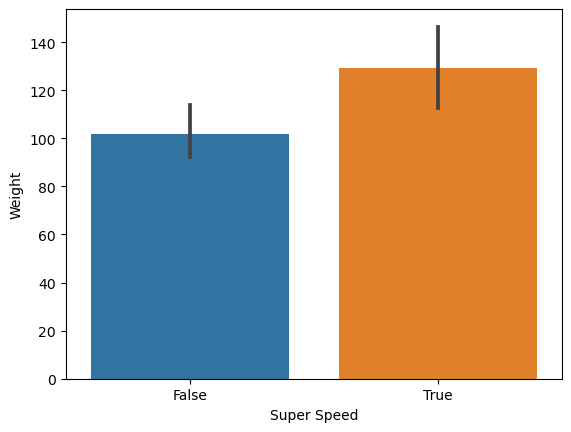

In [55]:
ax = sns.barplot(data=merged, x = 'Super Speed', y = 'Weight')

For the figure above we can assume that those super heros who do not have super speed tend to average lower in weight vs those that have super speed. 

2. What is the average height of heroes for each publisher?

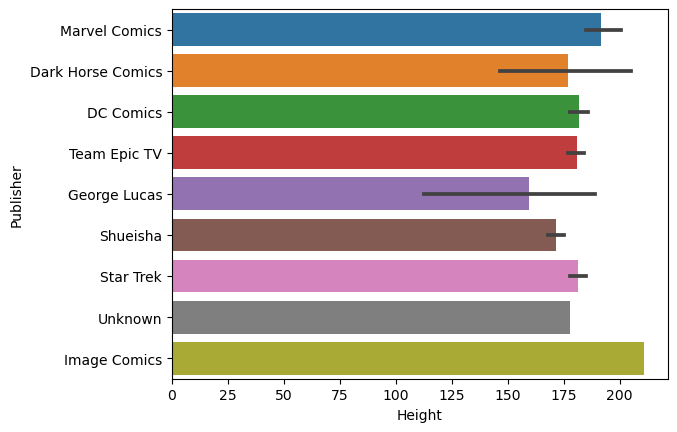

In [56]:
ax = sns.barplot(data=merged, x = 'Height', y = 'Publisher')

From the barplot above, we can see that the average height for Marvel and Dark horse differ vastly that DC comics. 